In [1]:
import xarray as xr
import numpy as np
import os
import arrow
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import matplotlib.dates as mdates

In [34]:
fcHour_list = list(range(0, 72+1, 3)) + list(range(78, 240+1, 6))
single_level_name_list = ['visi','v100','v10m','u100','u10m','t2mm','t2md','sstk']
multi_level_name_list = ['vwnd','uwnd','temp','rhum']

In [ ]:
print(fcHour_list)

In [ ]:
# 根据实况日期罗列出所有的对应起报时间和预报时效
current_time = arrow.get(2020,1,1,12)
print(current_time.format('YYYY-MM-DD HH'))
available_time_list = []
for fc_hour in fcHour_list:
    init_time = current_time.shift(hours=-fc_hour)
    if(init_time.hour%12 == 0):
        available_time_list.append({'init':init_time, 'hour':fc_hour,'hour_str':'{:0>3d}'.format(fc_hour)})

print(available_time_list)

In [14]:
file_59754 = 'H:/github/python/seafog/data/station/59754.20130101-2022093023.csv'
columns = ["V01301","D_RYMDHM","D_IYMDHM","V04001","V04002","V04003","V04004","V04005","V05001","V06001","V07001","V_BBB","V10004","V10051","V10061","V10062","V10301","V10301_052","V10302","V10302_052","V12001","V12011","V12011_052","V12012","V12012_052","V12405","V12016","V12017","V12003","V13003","V13007","V13007_052","V13004","V13019","V13020","V13021","V13022","V13023","V04080_04","V13011","V13033","V11290","V11291","V11292","V11293","V11296","V11042","V11042_052","V11201","V11202","V11211","V11046","V11046_052","V11503_06","V11504_06","V11503_12","V11504_12","V12310","V12311","V12311_052","V12121","V12121_052","V12013","V12030_005","V12030_010","V12030_015","V12030_020","V12030_040","V12030_080","V12030_160","V12030_320","V12314","V12315","V12315_052","V12316","V12316_052","V20001_701_01","V20001_701_10","V20059","V20059_052","V20001","V20010","V20051","V20011","V20013","V20350_01","V20350_02","V20350_03","V20350_04","V20350_05","V20350_06","V20350_07","V20350_08","V20350_11","V20350_12","V20350_13","V20003","V04080_05","V20004","V20005","V20062","V13013","V13330","V20330_01","V20331_01","V20330_02","V20331_02","V20212","V20213","V20218","V20402","C_20063","CRTTIME","KEYID","V13905","V13910","V13915","V13920","V13925","V13930","V13935","V13940","V13945","V13950","V13955","V13960"]
df_59754 = pd.read_csv(file_59754,sep=',',na_values=[9999])
df_59754.index = pd.to_datetime(df_59754["DDATETIME"])

C:\Users\henry_Hill\AppData\Local\Temp\ipykernel_23288\3894794084.py:3: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_59754 = pd.read_csv(file_59754,sep=',',na_values=[9999])


In [17]:
df_59754

,DDATETIME,V01301,D_RYMDHM,D_IYMDHM,V04001,V04002,V04003,V04004,V04005,V05001,...,V13925,V13930,V13935,V13940,V13945,V13950,V13955,V13960,FLAG_ELEMENTS,FLAG_RAIN
DDATETIME,,,,,,,,,,,,,,,,,,,,,
2013-01-31 04:00:00,2013-01-31 04:00:00.0,59754,2013-01-31 04:06:53.0,2013-01-31 04:07:40.0,2013,1,31,4,0,20.333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-31 05:00:00,2013-01-31 05:00:00.0,59754,2013-01-31 05:07:21.0,2013-01-31 05:07:31.0,2013,1,31,5,0,20.333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-31 06:00:00,2013-01-31 06:00:00.0,59754,2013-01-31 06:05:40.0,2013-01-31 06:05:53.0,2013,1,31,6,0,20.333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-31 07:00:00,2013-01-31 07:00:00.0,59754,2013-01-31 07:05:40.0,2013-01-31 07:07:54.0,2013,1,31,7,0,20.333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-31 08:00:00,2013-01-31 08:00:00.0,59754,2013-01-31 08:06:41.0,2013-01-31 08:11:16.0,2013,1,31,8,0,20.333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-27 06:00:00,2022-09-27 06:00:00.0,59754,2022-09-27 06:00:38.0,2022-09-27 06:00:39.0,2022,9,27,6,0,20.243,...,0.0,0.0,0.0,2.5,1.9,0.0,0.1,0.0,1.0,1.0
2022-09-27 07:00:00,2022-09-27 07:00:00.0,59754,2022-09-27 07:00:39.0,2022-09-27 07:00:39.0,2022,9,27,7,0,20.243,...,0.1,0.1,0.4,2.0,0.1,0.2,0.0,0.0,1.0,1.0
2022-09-27 08:00:00,2022-09-27 08:00:00.0,59754,2022-09-27 08:00:32.0,2022-09-27 08:24:32.0,2022,9,27,8,0,20.243,...,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [24]:
file_G7425 = 'H:/github/python/seafog/data/station/G7425/G7425-202012-202209new.csv'
columns_G7425 = ["ObserveTime","WindSpeed","WindDirect","MaxWindSpeed","MaxWindDirect","Temperature","RelativeHumidity","Pressure","SeaTemperature"]
df_G7425 = pd.read_csv(file_G7425,usecols=columns_G7425, na_values=[-9999.0])
df_G7425.index = pd.to_datetime(df_G7425["ObserveTime"], format='%Y%m%d%H%M')
df_G7425.head()

,ObserveTime,WindSpeed,WindDirect,MaxWindSpeed,MaxWindDirect,Temperature,RelativeHumidity,Pressure,SeaTemperature
ObserveTime,,,,,,,,,
2020-12-23 00:00:00,202012230000,3.2,38.0,4.3,56.0,18.5,80.0,1021.4,NaN
2020-12-23 00:10:00,202012230010,3.6,46.0,4.3,56.0,18.4,81.0,1021.3,NaN
2020-12-23 00:20:00,202012230020,3.3,41.0,4.4,46.0,18.6,81.0,1021.0,NaN
2020-12-23 00:30:00,202012230030,3.7,49.0,4.5,43.0,18.5,82.0,1020.9,NaN
2020-12-23 00:40:00,202012230040,3.7,56.0,4.5,46.0,18.4,82.0,1021.4,NaN


In [61]:
df_G7425.loc[df_G7425.index[0]]

ObserveTime         2.020122e+11
WindSpeed           3.200000e+00
WindDirect          3.800000e+01
MaxWindSpeed        4.300000e+00
MaxWindDirect       5.600000e+01
Temperature         1.850000e+01
RelativeHumidity    8.000000e+01
Pressure            1.021400e+03
SeaTemperature               NaN
Name: 2020-12-23 00:00:00, dtype: float64

In [26]:
file_key = "H:/github/python/seafog/station_key_readme.csv"
df_key = pd.read_csv(file_key)

,key,chn,en
0,DDATETIME,日期,date
1,V01301,站号,stationID
2,D_RYMDHM,收到时间,time_receive01
3,D_IYMDHM,入库时间,time_receive_final
4,V04001,资料观测年,year
...,...,...,...
124,V13950,45-50分降水量,pre_45_50
125,V13955,50-55分降水量,pre_50_55
126,V13960,55-60分降水量,pre_55_60
127,FLAG_ELEMENTS,NaN,NaN


In [30]:
df_key[df_key['en'].isin( ['year','month','day','hour','vis'])]

,key,chn,en
4,V04001,资料观测年,year
5,V04002,资料观测月,month
6,V04003,资料观测日,day
7,V04004,资料观测时,hour
81,V20001,能见度,vis


In [31]:
df_59754['V20001']

DDATETIME
2013-01-31 04:00:00        NaN
2013-01-31 05:00:00        NaN
2013-01-31 06:00:00    36000.0
2013-01-31 07:00:00        NaN
2013-01-31 08:00:00        NaN
                        ...   
2022-09-27 06:00:00     1800.0
2022-09-27 07:00:00     4700.0
2022-09-27 08:00:00    17700.0
2022-09-27 09:00:00     2100.0
2022-09-27 10:00:00     1200.0
Name: V20001, Length: 83314, dtype: float64

In [35]:
dir_path = 'H:/github/python/seafog/data/CFdata/concat/'
file_name = '201810-202205_lon110.25_lat20.125.sstk.nc'
var_key = 'sstk'
ds = xr.open_dataset(f'{dir_path}{file_name}')
varname_list = [f'{var_key}{v:0>3d}' for v in fcHour_list]
print(varname_list)
print(ds)

['sstk000', 'sstk003', 'sstk006', 'sstk009', 'sstk012', 'sstk015', 'sstk018', 'sstk021', 'sstk024', 'sstk027', 'sstk030', 'sstk033', 'sstk036', 'sstk039', 'sstk042', 'sstk045', 'sstk048', 'sstk051', 'sstk054', 'sstk057', 'sstk060', 'sstk063', 'sstk066', 'sstk069', 'sstk072', 'sstk078', 'sstk084', 'sstk090', 'sstk096', 'sstk102', 'sstk108', 'sstk114', 'sstk120', 'sstk126', 'sstk132', 'sstk138', 'sstk144', 'sstk150', 'sstk156', 'sstk162', 'sstk168', 'sstk174', 'sstk180', 'sstk186', 'sstk192', 'sstk198', 'sstk204', 'sstk210', 'sstk216', 'sstk222', 'sstk228', 'sstk234', 'sstk240']
<xarray.Dataset>
Dimensions:  (level: 1, time: 2678)
Coordinates:
    lon      float32 ...
    lat      float32 ...
  * level    (level) float32 0.0
  * time     (time) datetime64[ns] 2018-10-01 ... 2022-05-31T12:00:00
Data variables: (12/57)
    flag     (time) float32 ...
    stat     (time) float32 ...
    tstr     (time) float32 ...
    ystr     (time) float32 ...
    sstk000  (time) float32 ...
    sstk003  

In [49]:
da_time = pd.Series(ds['sstk000'].time)
print(da_time)
time_shift = da_time + pd.Timedelta(6,unit='h')
print(time_shift.dt.hour)

0      2018-10-01 00:00:00
1      2018-10-01 12:00:00
2      2018-10-02 00:00:00
3      2018-10-02 12:00:00
4      2018-10-03 00:00:00
               ...        
2673   2022-05-29 12:00:00
2674   2022-05-30 00:00:00
2675   2022-05-30 12:00:00
2676   2022-05-31 00:00:00
2677   2022-05-31 12:00:00
Length: 2678, dtype: datetime64[ns]
0        6
1       18
2        6
3       18
4        6
        ..
2673    18
2674     6
2675    18
2676     6
2677    18
Length: 2678, dtype: int64


In [55]:

ds['sstk012'].sel(time='2018-10-31 12:00')

<xarray.DataArray 'sstk012' ()>
array(299.345703)
Coordinates:
    lon      float32 110.2
    lat      float32 20.12
    time     datetime64[ns] 2018-10-31T12:00:00
Attributes:
    name:           sstk
    valid_min:      0.0
    standard_name:  sea_surface_skin_temperature
    units:          K
    long_name:      sea surface temperature
    short_name:     SST

In [57]:
da_time[0] in (ds['sstk012'].time) 

True

In [ ]:
# 先取得sstk 的 time
# 载入所有的dataset
# 遍历fcHour
# 提取各要素相同fchour的数据
# 合并多个array, xr.merge([ds/da])
# DataArray.to_series(),再合并pd.DataFrame({var:da.to_series})
# 输出各values to array
# https://docs.xarray.dev/en/stable/user-guide/combining.html#merge
# https://zhuanlan.zhihu.com/p/518580805
# 计算time offset
# 转换成pandas数据
# 根据时间检索出实况的能见度数据作为检验合并入其中df_G7425.loc[df_G7425.index[0]]
# 导出 csv 数据，每个起报时间csv文件

<AxesSubplot:xlabel='DDATETIME'>

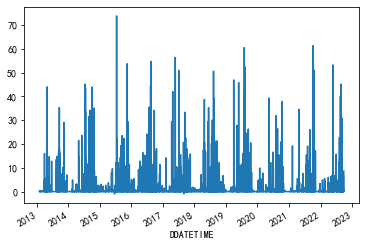

In [62]:
df_59754['V13019'].plot()